*DAIA - Week 4 Assignment*

# Missing data in the Titanic dataset

## 1. Introduction

In this titanic example we will focus on how to find, label and deal with missing data. Make sure you have studies the study materials in Canvas about the various types of missing data and how to handle these kind of missing data.

Each instance in the dataset has the following form:

     "1","1st",1,"Allen, Miss Elisabeth Walton",29.0000,"Southampton","St Louis, MO","B-5","24160 L221","2","female"
     
Note that the raw data consists largely of strings. To apply machine learning algo's these strings have to be converted to numerical data first (at least the columns that are of interest)!

## 2. Data collection

Pandas is a Python module that works with the so-called dataframe concept (rows are observations, columns refer to the features). A dataframe is essentially a two-dimensional labeled data structure where
each column represent a feature and each row represents an observation.

More details, see: https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii 

### 2.1. Load Dataset

Download the Titanic dataset (csv file) from Canvas, read it with Pandas into a dataframe. Show the first 5 rows.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
import plotly.graph_objects as go
import plotly.express as px
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

print('numpy version:', np.__version__)
print('matplotlib version:', pd.__version__)

## To get you started...
df_titanic = pd.read_csv("Titanic.csv")

column_names = df_titanic.columns[0]

df_titanic = df_titanic[column_names].str.split(r',(?![\s])', expand=True)

df_titanic.columns = column_names.split(',')

df_titanic.head(5)

numpy version: 1.26.4
matplotlib version: 2.2.1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"""Braund, Mr. Owen Harris""",male,22,1,0,A/5 21171,7.25,,S
1,2,1,1,"""Cumings, Mrs. John Bradley (Florence Briggs T...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"""Heikkinen, Miss. Laina""",female,26,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"""Futrelle, Mrs. Jacques Heath (Lily May Peel)""",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"""Allen, Mr. William Henry""",male,35,0,0,373450,8.05,,S


## 3.  Data understanding

You can examine the datatypes and some general (statistical) information about the dataset. See if you can already see something odd or striking, which indicates missing data.

In [2]:

print('Valau types')
display(df_titanic.dtypes)



## Why is it good to first check the datatypes, before examining the columns or values for missing data?

## Your answer (and explanation):
# it is good to see what the dataset is made out of before there is any coralation finding. this is also where you can see if there is something wrong with your dataset or how reliable it is. 


Valau types


PassengerId    object
Survived       object
Pclass         object
Name           object
Sex            object
Age            object
SibSp          object
Parch          object
Ticket         object
Fare           object
Cabin          object
Embarked       object
dtype: object

Which columns contain missing values? You should find at least 3 (4 is better ;) ). 

after some looking around I figured out that there are 3 columns with missing data (age, cabin and Embarked) and one column with a datatype that doesn't match with the others, this column is ticket with the entry of 'LINE', it is currently unclear why they have the LINE ticket but I will for now count that as the alusive 4e null in this data set.

In [3]:

# change datatypes. 
df_titanic['PassengerId'] = df_titanic['PassengerId'].apply(lambda x: x if x !='' else np.nan).astype(int)
df_titanic['Survived'] = df_titanic['Survived'].astype(int).apply(lambda x: x if x in [0, 1] else np.nan).astype(bool)
df_titanic['Pclass'] = df_titanic['Pclass'].astype(int).apply(lambda x: x if x in [1, 2, 3] else np.nan)

df_titanic['Name'] = df_titanic['Name'].apply(lambda x: x if x !='' else np.nan).astype(str)
df_titanic['Sex'] = df_titanic['Sex'].astype(str).apply(lambda x: x if x in ['male', 'female'] else np.nan)

# df_titanic['Sex'] = df_titanic['Sex'].astype(str).apply(lambda x: 0 if x == 'male' else 1 if x == 'female' else np.nan).astype(bool)

df_titanic['Age'] = df_titanic['Age'].apply(lambda x: x if x !='' else np.nan).astype(float)

df_titanic['SibSp'] = df_titanic['SibSp'].astype(int).apply(lambda x: x if x >= 0 else np.nan)
df_titanic['Parch'] = df_titanic['Parch'].astype(int).apply(lambda x: x if x >= 0 else np.nan)

df_titanic['Ticket'] = df_titanic['Ticket'].astype(str).apply(lambda x: x if x !='' else np.nan)
df_titanic['Fare'] = df_titanic['Fare'].apply(lambda x: x if x !='' else np.nan).astype(float)
df_titanic['Cabin'] = df_titanic['Cabin'].apply(lambda x: x if x !='' else np.nan)
df_titanic['Embarked'] = df_titanic['Embarked'].apply(lambda x: x if x in ['C', 'S', 'Q'] else np.nan)


print('is nan command:')
display(df_titanic.isna().sum())

display(df_titanic)

display(df_titanic[df_titanic['Ticket'] == 'LINE'])

is nan command:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"""Braund, Mr. Owen Harris""",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"""Cumings, Mrs. John Bradley (Florence Briggs T...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"""Heikkinen, Miss. Laina""",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"""Futrelle, Mrs. Jacques Heath (Lily May Peel)""",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"""Allen, Mr. William Henry""",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"""Montvila, Rev. Juozas""",male,27.0,0,0,211536,13.0000,NaN,S
887,888,True,1,"""Graham, Miss. Margaret Edith""",female,19.0,0,0,112053,30.0000,B42,S
888,889,False,3,"""Johnston, Miss. Catherine Helen """"Carrie""""""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,True,1,"""Behr, Mr. Karl Howell""",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,False,3,"""Leonard, Mr. Lionel""",male,36.0,0,0,LINE,0.0,NaN,S
271,272,True,3,"""Tornquist, Mr. William Henry""",male,25.0,0,0,LINE,0.0,NaN,S
302,303,False,3,"""Johnson, Mr. William Cahoone Jr""",male,19.0,0,0,LINE,0.0,NaN,S
597,598,False,3,"""Johnson, Mr. Alfred""",male,49.0,0,0,LINE,0.0,NaN,S


Next step is to examine and explain *why* these values are missing. Remember MCAR, MAR, M(C)NAR... Don't forget to use visualization (histograms might be useful) as well to investigate or explain this.

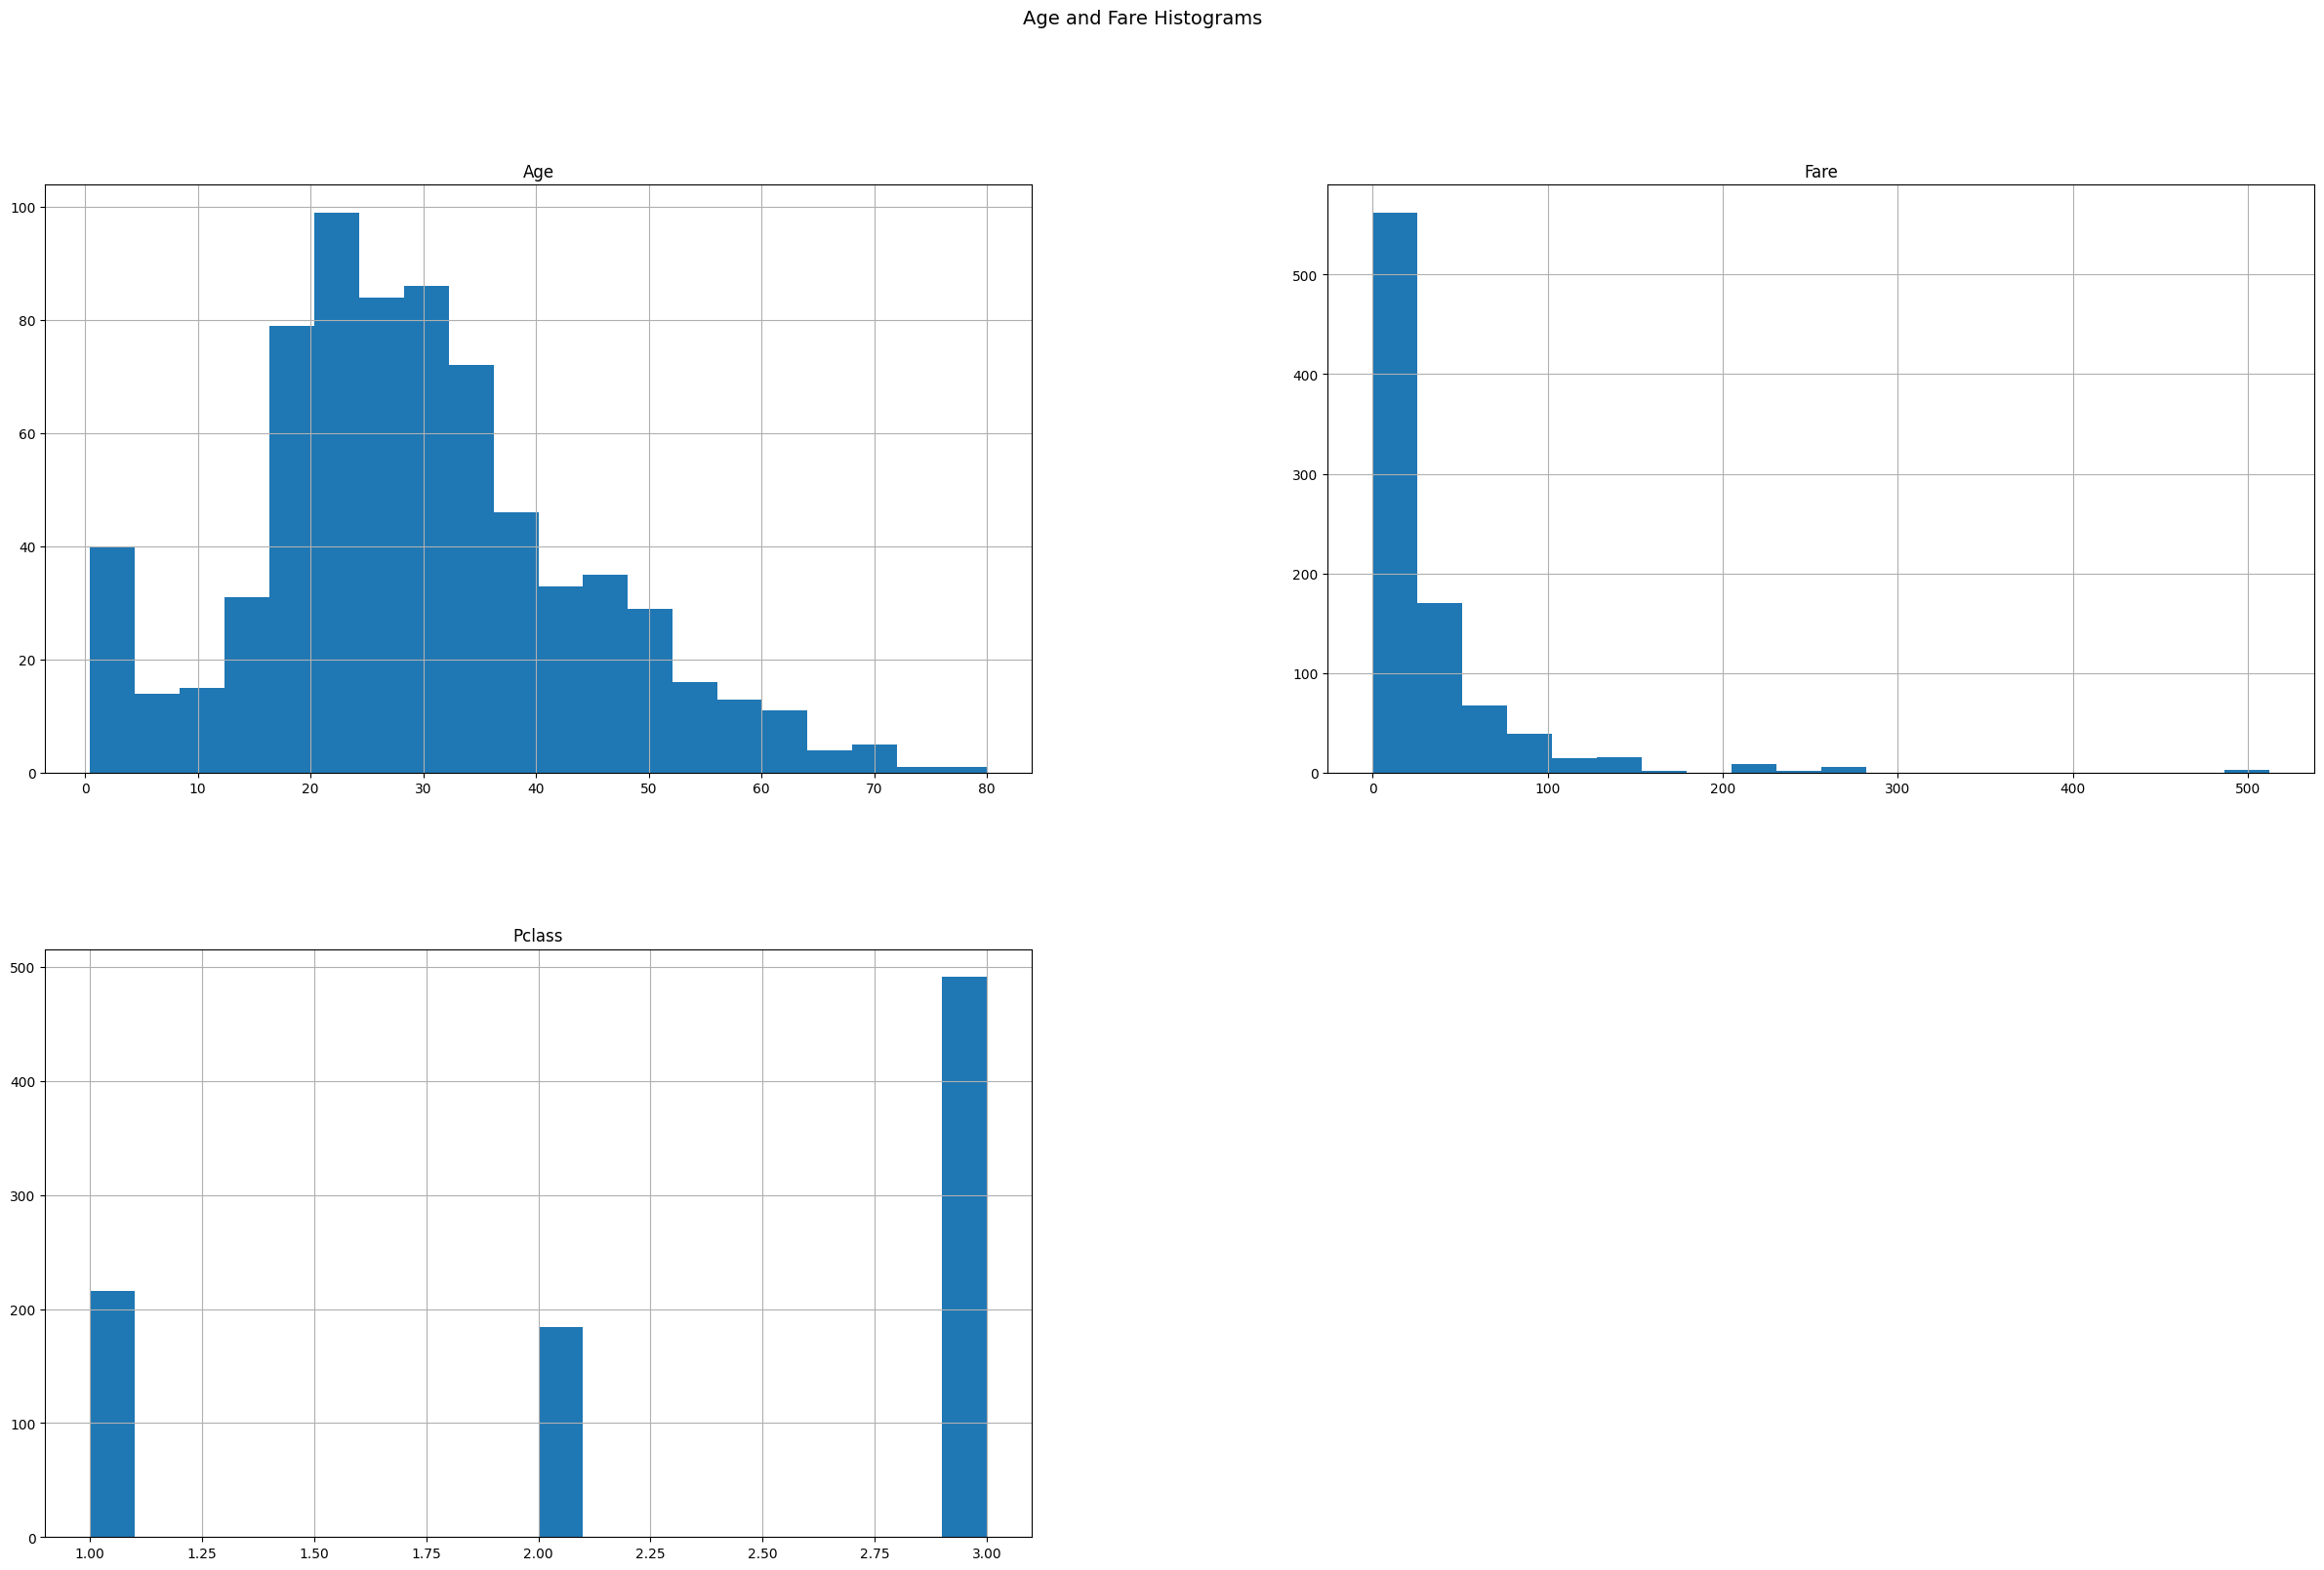

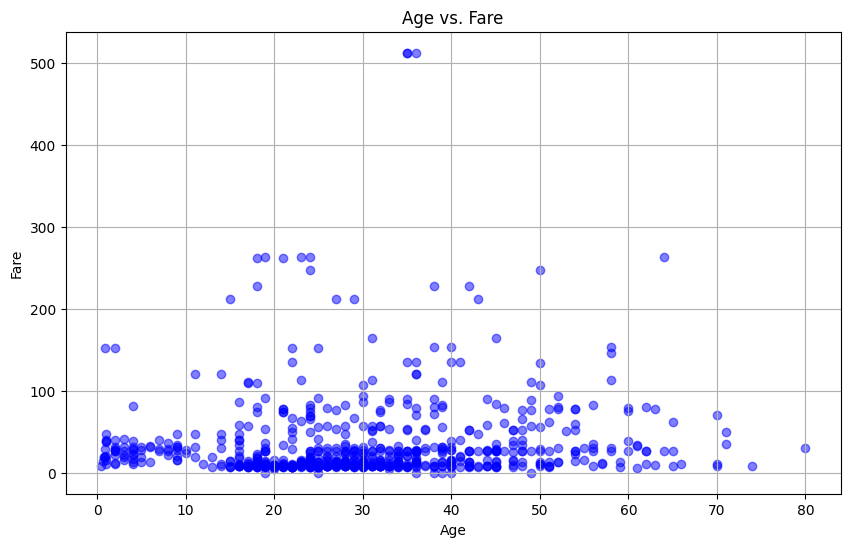

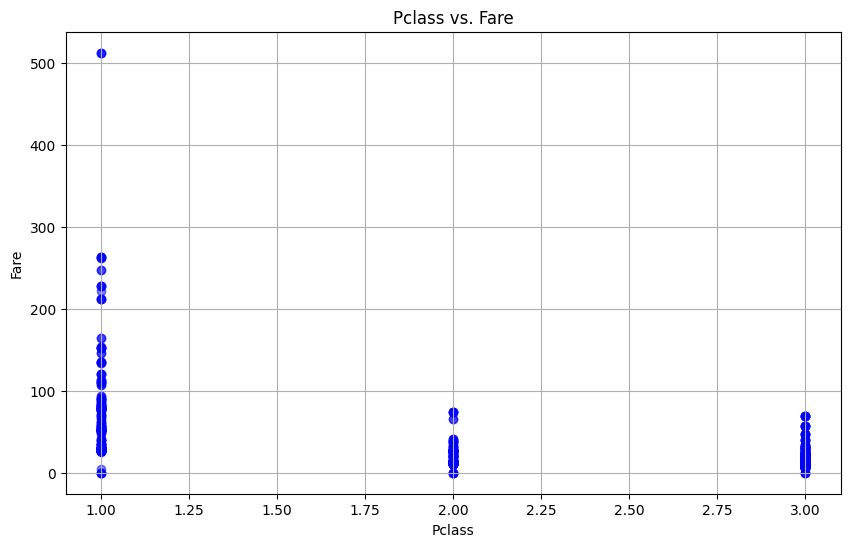

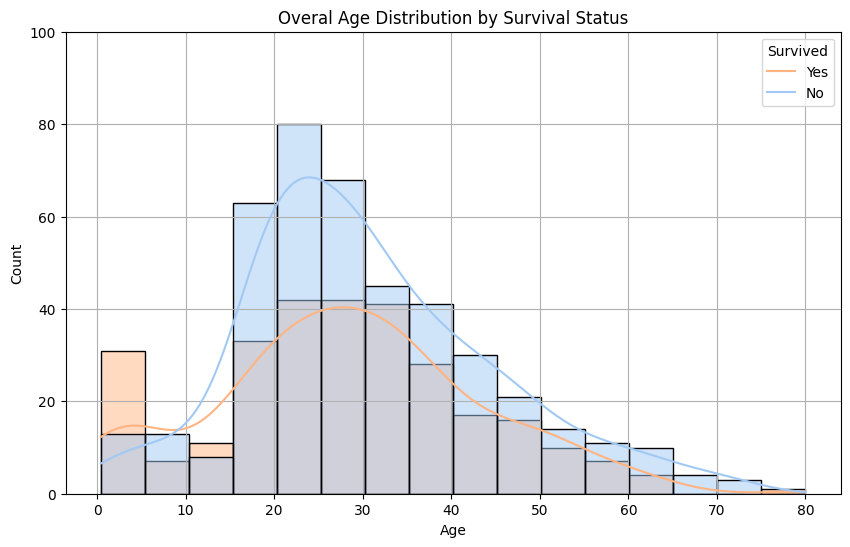

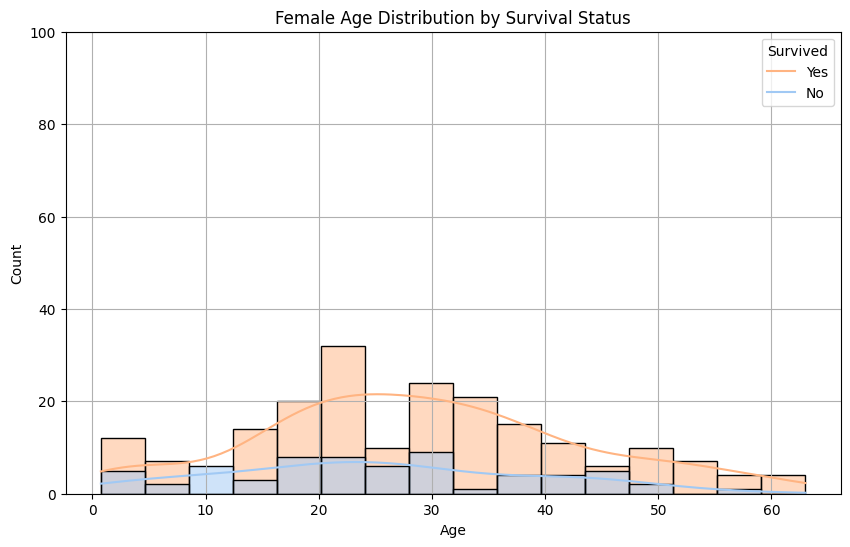

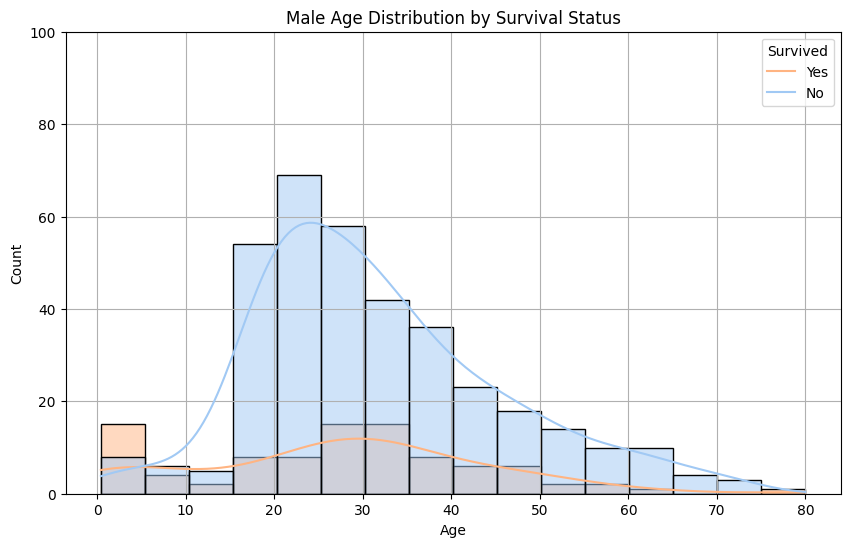

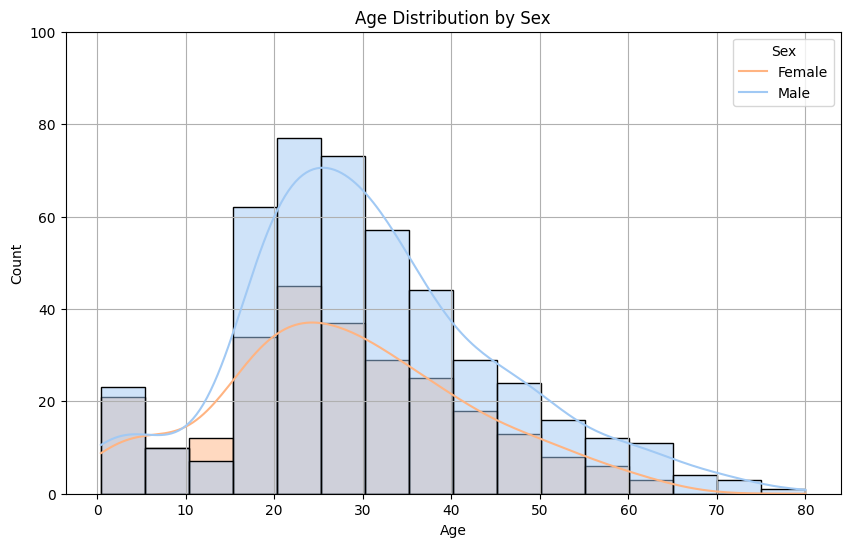

In [4]:
# i beleave that Age can be considered to be MCAR (Missing Complerly at random) because it is something personal so people can forget about it.

# cabin is more like a MAR (Missing at random) seeing that it belongs more to the passager backlog and data recovery. it could also be usefull for survival

# i also have no idea why a couple don't have a Embarked location. how did you even forget where the person got on.

## Your code and comments....

df_titanic[['Age', 'Fare', 'Pclass']].hist(bins=20, figsize=(30, 18))
plt.suptitle("Age and Fare Histograms", fontsize=14)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_titanic['Age'], df_titanic['Fare'], alpha=0.5, color='b')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_titanic['Pclass'], df_titanic['Fare'], alpha=0.5, color='b')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Pclass vs. Fare')
plt.grid(True)
plt.show()


def Showhistplot(data, x_val, Y_val, title, Y_val_lables = ['Yes','No'], bins = 16, y_lim = 100 ) :
    plt.figure(figsize=(10, 6))
    sns.histplot(data, x=x_val, hue=Y_val, bins=bins, kde=True, palette='pastel', element='bars')
    plt.title(title)
    plt.xlabel(x_val)
    plt.ylabel('Count')
    plt.legend(title=Y_val, labels=Y_val_lables)
    plt.grid(True)
    plt.ylim(0, y_lim)
    plt.show()


Showhistplot(data=df_titanic, x_val='Age', Y_val='Survived', title='Overal Age Distribution by Survival Status')

Showhistplot(data=df_titanic[df_titanic['Sex'] == 'female'], x_val='Age', Y_val='Survived', title='Female Age Distribution by Survival Status')

Showhistplot(data=df_titanic[df_titanic['Sex'] == 'male'], x_val='Age', Y_val='Survived', title='Male Age Distribution by Survival Status')

Showhistplot(data=df_titanic, x_val='Age', Y_val='Sex', title='Age Distribution by Sex', Y_val_lables=['Female', 'Male'])


## 4. Data Preparation

### 4.1. Deal with Missing Values

You have found some (indications, clues for) missing data. Under 'Data Understanding' you have looked for reasons why and perhaps also found some relationships with other values or features. That helps you to 'label' the type of missing data. Now it's time to deal with the missing values. It could be a requirement of the  machine learning model that it needs a complete set of values for a feature. There are several options as you know. Deleting rows can reduce missing values, but it also reduces the total amount of data... Another way is to fill  it in with guesses. You will be introducing some noise into a model, but if you canmake reasonable guesses, some of them should be close to the historical truth (whatever it was...), and the overall predictive power of the model might still make a better model than before. 

#### Look at the features with missing data and explain and apply a suitable method to deal with these missing values...

I have choosen to check all methods and see what gives reasanable data. nut to understand reasanable data you need to understand that that is always depended on what you plan to do with it. but for the age that i used for testing here it seems that neerest naghbor would make the more even answer without much change.

In [5]:

from scipy.stats import gaussian_kde

# Regression Imputation
regression_imputation_df_titanic = df_titanic.copy()

# Select rows without missing 'Age' values
df_train = regression_imputation_df_titanic[regression_imputation_df_titanic['Age'].notna()]

# Select rows with missing 'Age' values
missing_age_data = regression_imputation_df_titanic[regression_imputation_df_titanic['Age'].isna()]

# Initialize a linear regression model
model = LinearRegression()

# Train the model
features = ['Pclass', 'SibSp', 'Parch', 'Fare']
model.fit(df_train[features], df_train['Age'])

# Predict the missing 'Age' values
predicted_ages = model.predict(missing_age_data[features])

# Fill the missing 'Age' values in the original DataFrame
regression_imputation_df_titanic.loc[regression_imputation_df_titanic['Age'].isna(), 'Age'] = predicted_ages





# Mean/Median/Mode Imputation
mean_imputation_df_titanic = df_titanic.copy()

mean_imputation_df_titanic['Age'] = mean_imputation_df_titanic['Age'].fillna(mean_imputation_df_titanic['Age'].mean())





# Initialize K-Nearest Neighbors (KNN) Imputation
KNNImputer_df_titanic = df_titanic.copy()

# You can adjust the number of neighbors (n_neighbors parameter)
imputer = KNNImputer(n_neighbors=3)

# Use only numeric columns
numeric_df = KNNImputer_df_titanic.select_dtypes(include=[np.number])

# Perform KNN imputation
imputed = imputer.fit_transform(numeric_df)

# Convert the result back to a DataFrame
imputed_df = pd.DataFrame(imputed, columns=numeric_df.columns)

# Replace the original DataFrame's numeric columns with the imputed values
KNNImputer_df_titanic[numeric_df.columns] = imputed_df




# Initialize IterativeImputer
iterativeImputer_df_titanic = df_titanic.copy()
imputer = IterativeImputer(max_iter=20, random_state=0)

# Use only numeric columns
numeric_df = iterativeImputer_df_titanic.select_dtypes(include=[np.number])

# Perform multiple imputations
imputed = imputer.fit_transform(numeric_df)

# Convert the result back to a DataFrame
imputed_df = pd.DataFrame(imputed, columns=numeric_df.columns)

# Replace the original DataFrame's numeric columns with the imputed values
iterativeImputer_df_titanic[numeric_df.columns] = imputed_df




# create all traces to the data list
data = [
    go.Histogram(x=mean_imputation_df_titanic['Age'], opacity=0.75, name='Mean/Median/Mode Imputation'),
    go.Histogram(x=regression_imputation_df_titanic['Age'], opacity=0.75, name='Regression Imputation'),
    go.Histogram(x=KNNImputer_df_titanic['Age'], opacity=0.75, name='K-Nearest Neighbors (KNN) Imputation'),
    go.Histogram(x=iterativeImputer_df_titanic['Age'], opacity=0.75, name='iterativeImputer'),
    go.Histogram(x=df_titanic['Age'], opacity=0.75, name='original values')
    ]

# Define the layout
layout = go.Layout(title_text='Age Distribution', xaxis_title_text='Age', yaxis_title_text='Count', bargap=0.2, bargroupgap=0.1)

# Create the figure and add the data and layout
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()

combined_df = pd.concat([
    mean_imputation_df_titanic['Age'],
    regression_imputation_df_titanic['Age'],
    KNNImputer_df_titanic['Age'],
    iterativeImputer_df_titanic['Age'],
    df_titanic['Age']
], axis=1, keys=['Mean/Median/Mode Imputation', 'Regression Imputation', 'K-Nearest Neighbors (KNN) Imputation', 'iterativeImputer', 'Original Values'])

# Create a box plot
fig = px.box(combined_df, title='Age Distribution by Imputation Method')
fig.show()
